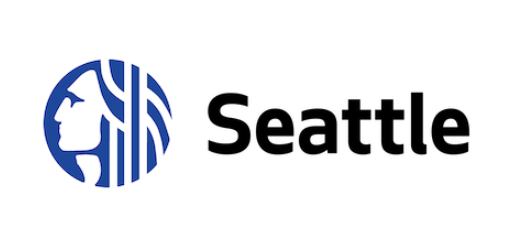

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 46)

# Contexte
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.


<br>
<br>
<br>
<br>
Le Building Energy Benchmarking and Reporting Program de Seattle (SMC 22.920) exige des propriétaires de bâtiments non résidentiels et multifamiliaux (20 000 pieds carrés ou plus) qu'ils suivent leurs performances énergétiques et présentent un rapport annuel à la ville de Seattle. Les bâtiments sont responsables de 33 % des émissions de base de Seattle. La politique d'analyse comparative soutient les objectifs de Seattle visant à réduire la consommation d'énergie et les émissions de gaz à effet de serre des bâtiments existants. En 2013, la ville de Seattle a adopté un plan d'action climatique visant à atteindre des émissions nettes de gaz à effet de serre (GES) nulles d'ici 2050. L'analyse comparative annuelle, les rapports et la divulgation de la performance des bâtiments sont des éléments fondamentaux pour créer une plus grande valeur marchande pour l'efficacité énergétique.
Conformément à l'ordonnance (125000), à partir de 2015, la ville de Seattle publiera chaque année les données relatives à tous les bâtiments de 20 000 pieds carrés et plus. Cette mise à jour du mandat d'analyse comparative a été adoptée par le conseil municipal de Seattle le 29 février 2016.


# Objectifs
Vous cherchez également à évaluer l’intérêt de l’**ENERGY STAR Score** pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

* Réaliser une courte analyse exploratoire.
* Tester différents modèles de prédiction afin de répondre au mieux à la problématique.


Chargez le fichier `2016_Building_Energy_Benchmarking.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df`.

In [2]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv') 

Head() pour afficher les 5 premières lignes du dataframe `df`.

In [3]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


la taille du dataframe avec shape

In [4]:
df.shape

(3376, 46)

min, max, moyenne, écart type, etc) pour toutes les variables quantitatives avec describes

In [5]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [6]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
for col in df.columns:
    print(f'{col :-<70} {df[col].nunique()}')

OSEBuildingID--------------------------------------------------------- 3376
DataYear-------------------------------------------------------------- 1
BuildingType---------------------------------------------------------- 8
PrimaryPropertyType--------------------------------------------------- 24
PropertyName---------------------------------------------------------- 3362
Address--------------------------------------------------------------- 3354
City------------------------------------------------------------------ 1
State----------------------------------------------------------------- 1
ZipCode--------------------------------------------------------------- 55
TaxParcelIdentificationNumber----------------------------------------- 3268
CouncilDistrictCode--------------------------------------------------- 7
Neighborhood---------------------------------------------------------- 19
Latitude-------------------------------------------------------------- 2876
Longitude------------------------

In [8]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

# Data Cleaning

 ## Bâtiment résidentiel/ non résidentiel
 
 Un bâtiment doit être considéré comme un bâtiment résidentiel lorsque plus de la moitié de la surface de plancher est utilisée à des fins d'habitation. Les autres bâtiments doivent être considérés comme non résidentiels.

Deux types de bâtiments résidentiels peuvent être distingués :

- maisons (bâtiments d'habitation en plain-pied) : comprenant tous les types de maisons (maisons individuelles, mitoyennes, mitoyennes, maisons en enfilade, etc.) dont chaque logement a sa propre entrée directement depuis le sol ;

- autres immeubles d'habitation : comprenant tous les immeubles d'habitation autres que les immeubles d'habitation en plain-pied tels que définis ci-dessus.

Un bâtiment est considéré comme un bâtiment non résidentiel lorsque la partie mineure du bâtiment (c'est-à-dire moins de la moitié de sa surface de plancher brute) est utilisée à des fins d'habitation.

Les bâtiments non résidentiels comprennent :

- bâtiments industriels ;
- les bâtiments commerciaux ;
- les bâtiments scolaires ;
- les bâtiments de santé ;
- d'autres bâtiments.

### LargestPropertyUseType

In [9]:
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].astype(str)

In [10]:
df["USE"] = df['LargestPropertyUseType'].apply(
    lambda x: x.split('-')[0])

In [11]:
df["USE"].value_counts().index.tolist()

['Multifamily Housing',
 'Office',
 'Non',
 'K',
 'Other',
 'Retail Store',
 'Other ',
 'Hotel',
 'Worship Facility',
 'Distribution Center',
 'Senior Care Community',
 'Supermarket/Grocery Store',
 'Medical Office',
 'Parking',
 'Self',
 'College/University',
 'Residence Hall/Dormitory',
 'nan',
 'Laboratory',
 'Restaurant',
 'Refrigerated Warehouse',
 'Social/Meeting Hall',
 'Hospital (General Medical & Surgical)',
 'Manufacturing/Industrial Plant',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Strip Mall',
 'Museum',
 'Fitness Center/Health Club/Gym',
 'Automobile Dealership',
 'Urgent Care/Clinic/Other Outpatient',
 'Other/Specialty Hospital',
 'Library',
 'Financial Office',
 'Bank Branch',
 'Data Center',
 'Prison/Incarceration',
 'Performing Arts',
 'Lifestyle Center',
 'Adult Education',
 'Pre',
 'Wholesale Club/Supercenter',
 'Fire Station',
 'Residential Care Facility',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Movie Theater',
 'Food Service',
 'Polic

In [12]:
non_residential = ['Office', 'Other', 'Retail Store', 'Other ', 'Hotel', 'Worship Facility', 'Distribution Center', 'Medical Office',
                   'Supermarket/Grocery Store', 'Parking', 'Self', 'College/University', 'Laboratory', 'Refrigerated Warehouse', 'Restaurant',
                   'Hospital (General Medical & Surgical)', 'Social/Meeting Hall', 'Manufacturing/Industrial Plant', 'Strip Mall', 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
                   'Fitness Center/Health Club/Gym', 'Automobile Dealership', 'Museum', 'Bank Branch', 'Urgent Care/Clinic/Other Outpatient',
                   'Library', 'Other/Specialty Hospital', 'Financial Office', 'Data Center', 'Prison/Incarceration', 'Performing Arts',
                   'Lifestyle Center', 'Adult Education', 'Fire Station', 'Convention Center', 'Food Service', 'Movie Theater', 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
                   'Wholesale Club/Supercenter', 'Courthouse', 'Police Station']

In [13]:
df = df[df["USE"].isin(non_residential)]

L'objectif ici est d'identifier les possibles erreurs d'étiquette pour le property type, nous croisons les données de building type et primary property type

In [14]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

BuildingType,Campus,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12
PrimaryPropertyType,,,,,,,,
Distribution Center,0,0,0,0,51,2,0,0
Hospital,0,0,0,0,10,0,0,0
Hotel,0,1,0,0,75,0,0,0
Laboratory,0,0,0,0,10,0,0,0
Large Office,1,0,0,0,168,4,0,0
Medical Office,0,0,0,0,38,1,0,0
Mixed Use Property,4,0,1,1,79,8,0,0
Office,0,0,0,0,0,3,0,0
Other,7,1,4,1,183,55,0,2


In [15]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Campus',
       'SPS-District K-12', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Multifamily MR (5-9)',
       'Nonresidential WA'], dtype=object)

### Multifamily HR (10+)

In [16]:
df.loc[(df['BuildingType'] == 'Multifamily HR (10+)') & (
            df['PrimaryPropertyType'] != 'High-Rise Multifamily'), ['PrimaryPropertyType','PropertyName','Address']]

,PrimaryPropertyType,PropertyName,Address
876,Other,The Olivian,809 Olive Way
2823,Hotel,Four Seasons Hotel,99 Union Street


In [17]:
df.loc[2823,'BuildingType'] = 'NonResidential'

Nous savons juste que l'hotel Four Season n'est un pas considéré comme un bâtiment résidentiel. Les hôtels sont des établissements commerciaux

In [18]:
df.loc[(df['BuildingType'] != 'Multifamily HR (10+)') & (
            df['PrimaryPropertyType'] == 'High-Rise Multifamily'), ['BuildingType','PropertyName','Address']]

,BuildingType,PropertyName,Address


In [19]:
df.drop(df[df['PrimaryPropertyType'] == 'High-Rise Multifamily'].index, inplace = True)

### Multifamily LR (1-4)
* Si nous retrouvons des Senior care service, ils sont considérées comme des bâtiments résidentiels. Elles sont conçues pour offrir un logement et des soins de qualité aux personnes âgées. Nous n'apporterons pas de modification
* Other peut également décrire des bâtiments résidentiels, type des batiments de communauté

In [20]:
df.loc[(df['BuildingType'] == 'Multifamily LR (1-4)') & (
    df['PrimaryPropertyType'] != 'Low-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE
760,Other,APEX BELLTOWN COOP,2225 First Ave,Other
1076,Small- and Mid-Sized Office,Queenview Apartments,621 W Galer St,Office
1444,Other,ELDORADO II,3601 24th Ave West,Other
2142,Other,ID 3551996 - Lander Artist Studios,111 S LANDER ST,Other
2169,Mixed Use Property,Brattain Building,8501 Greenwood Avenue N,Self
2696,Other,Sigma Chapter of Alpha Phi Holding Inc.,4710 19th Avenue NE,Other
2773,University,NW Alpha Chi Omega,4545 17th Ave,College/University


In [21]:
df.loc[2142,'BuildingType'] = 'NonResidential'
df.loc[2773,'BuildingType'] = 'NonResidential'

In [22]:
df.loc[(df['BuildingType'] != 'Multifamily LR (1-4)') & (
    df['PrimaryPropertyType'] == 'Low-Rise Multifamily'), ['BuildingType', 'PropertyName', 'Address','USE']]

,BuildingType,PropertyName,Address,USE


In [23]:
df.drop(df[df['PrimaryPropertyType'] == 'Low-Rise Multifamily'].index, inplace = True)

### Multifamily MR (5-9)

In [24]:
df.loc[(df['BuildingType'] == 'Multifamily MR (5-9)') & (
            df['PrimaryPropertyType'] != 'Mid-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE
1484,Mixed Use Property,507 Northgate,507 NE Northgate Way,Parking
1947,Other,Hillclimb Court,1425 Western Avenue,Parking


In [25]:
df.loc[(df['BuildingType'] != 'Multifamily MR (5-9)') & (
            df['PrimaryPropertyType'] == 'Mid-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE


In [26]:
df.drop(df[df['PrimaryPropertyType'] == 'Mid-Rise Multifamily'].index, inplace = True)

### NonResidential
Nous allons devoir éliminer les étiquettes suivantes catégorisé actuellement comme non résidentiel 
* Residence Hall : Les résidences étudiantes sont considérées comme des bâtiments résidentiels.
* Senior Care Community

In [27]:
df.loc[(df['BuildingType'] == 'NonResidential') & (
            df['PrimaryPropertyType'] == 'Residence Hall'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE


In [28]:
df.loc[(df['BuildingType'] == 'NonResidential') & (
            df['PrimaryPropertyType'] == 'Senior Care Community'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE


Nous n'obserons pas de champs abérants, l'ensemble de row donne une indication sur des batiments résidentiels

In [29]:
df.drop(df[df['PrimaryPropertyType'] == 'Senior Care Community'].index, inplace = True)

### Campus
Les campus universitaires ne sont généralement pas considérés comme des bâtiments résidentiels, mais plutôt comme des complexes universitaires. Un campus universitaire est un ensemble de bâtiments et de terrains qui appartiennent à une université ou à une école et qui sont utilisés pour l'enseignement, la recherche et d'autres activités universitaires. Les campus universitaires comprennent souvent des salles de classe, des laboratoires, des bibliothèques, des restaurants, des centres sportifs et d'autres installations

In [30]:
df.loc[(df['BuildingType'] == 'Campus'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE
35,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Office
105,University,SSCC MAIN CAMPUS,6000 16th Ave SW,College/University
128,University,NSCC MAIN CAMPUS,9600 COLLEGE WAY N,College/University
162,Large Office,South Park,1420 S Trenton,Office
195,Other,P66 Bell Harbor International Conference Cente...,2225 Alaskan Way,Other
289,Mixed Use Property,Main Market,1501 Pike Place,Retail Store
301,Mixed Use Property,Securities Building Campus,1904 Third Avenue,Parking
340,Other,Weintraub/Hutchinson/Thomas,1100 Fairview Ave N,Other
661,Other,Pacific Multiforms Inc- Campus,6606 Urusla Pl. South,Manufacturing/Industrial Plant
1297,Mixed Use Property,Economy Market,1433 First Avenue,Retail Store


In [31]:
df.loc[35,'PrimaryPropertyType'] = 'Large Office'
df.loc[289,'PrimaryPropertyType'] = 'Retail Store'
df.loc[301,'PrimaryPropertyType'] = 'Other'
df.loc[1297,'PrimaryPropertyType'] = 'Retail Store'

In [32]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

BuildingType,Campus,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12
PrimaryPropertyType,,,,,,,,
Distribution Center,0,0,0,0,51,2,0,0
Hospital,0,0,0,0,10,0,0,0
Hotel,0,0,0,0,76,0,0,0
Laboratory,0,0,0,0,10,0,0,0
Large Office,2,0,0,0,168,4,0,0
Medical Office,0,0,0,0,38,1,0,0
Mixed Use Property,0,0,1,1,79,8,0,0
Office,0,0,0,0,0,3,0,0
Other,8,1,3,1,184,55,0,2


### Mixed Use Property

Nous traiterons par la suite les batiments avec l'étiquette **Mixed Use Property**
* **Mixed use property** is property with a residential and non-residential part, for example, a shop with an apartment upstairs

Les hôtels ne sont pas considérés comme des bâtiments résidentiels. Les hôtels sont des établissements commerciaux qui offrent des chambres et des suites à des clients qui voyagent pour affaires ou pour le plaisir.

Nous utiliserons regex pour pouvoir appliquer et cibler pour conserver uniquement les batiments résidentiels

In [33]:
df['Name'] = df.loc[(df['PrimaryPropertyType'] == 'Mixed Use Property'), ['PropertyName']].astype(str)

In [34]:
df.loc[(df['PrimaryPropertyType'] == 'Mixed Use Property'), ['Name']].value_counts().index.tolist()

[('(ID#40008) KC Metro Transit Power Distribution',),
 ("Lyon's Antique Mall - Windermere/Garlic Jims",),
 ('Richmark Label',),
 ('Rainier Community Center',),
 ('Puget Sound Energy Georgetown Operations Center',),
 ('Prudential Building',),
 ('Pike Building',),
 ('Pier 56',),
 ('Pier 54',),
 ('Pacific Tower',),
 ('Pacific Office Automation',),
 ('On Ballard- 425 Westlake',),
 ('Olympic Sculpture Park',),
 ('Oddfellows',),
 ('OCC Complex',),
 ('Northgate Community Center',),
 ('New Central',),
 ('Murphy Ballard Building',),
 ('Market Street Holdings',),
 ('Marion 823',),
 ('Mann Building',),
 ('Russell Hall',),
 ('SPBS LLC',),
 ('Salmon Bay Marine Center West',),
 ('U.S. BANK',),
 ('Yesler Community Center',),
 ('Workshops Seattle Lake City Way',),
 ('West Seattle Venture, LLC',),
 ('Wallingford Center',),
 ('WALDEN BUILDING',),
 ('Van Asselt Community Center',),
 ('Union Bay Plaza',),
 ('UW Medicine Research Phase II',),
 ('Trader Joes/AAA',),
 ('Saturn Building',),
 ('The Rainier Clu

Nous allons pouvoir filtrer par les mots suivants caractérisant des batiments non résidentiel
* Center, Fitness, Food, Market, Bank,BANK, Hotel, Office, Sculpture, Club, Museum, Art, Metro,University


Nous avons remarqué d'autres nom dans la liste, il s'agit de non résidentiel
* Hyatt Place,Automobili Italiane

In [35]:
import re

In [36]:
Center = re.compile('Center')
Fitness = re.compile('Fitness')
Food = re.compile('Food')
Market = re.compile('Market')
Bank = re.compile('Bank')
BANK = re.compile('BANK')
Hotel = re.compile('Hotel')
Office = re.compile('Office')
Sculpture = re.compile('Sculpture')
Club = re.compile('Club')
Museum = re.compile('Museum')
Art = re.compile('Art')
Metro = re.compile('Metro')
University = re.compile('University')

In [37]:
Hyatt_Place = re.compile('Hyatt Place')
Automobili_Italiane = re.compile('Automobili Italiane')

In [38]:
df['Center'] = df['Name'].str.extract('(Center)', expand=True)
df['Fitness'] = df['Name'].str.extract('(Fitness)', expand=True)
df['Food'] = df['Name'].str.extract('(Food)', expand=True)
df['Market'] = df['Name'].str.extract('(Market)', expand=True)
df['Bank'] = df['Name'].str.extract('(Bank)', expand=True)
df['BANK'] = df['Name'].str.extract('(BANK)', expand=True)
df['Hotel'] = df['Name'].str.extract('(Hotel)', expand=True)
df['Office'] = df['Name'].str.extract('(Office)', expand=True)
df['Sculpture'] = df['Name'].str.extract('(Sculpture)', expand=True)
df['Club'] = df['Name'].str.extract('(Club)', expand=True)
df['Museum'] = df['Name'].str.extract('(Museum)', expand=True)
df['Art'] = df['Name'].str.extract('(Art)', expand=True)
df['Metro'] = df['Name'].str.extract('(Metro)', expand=True)
df['University'] = df['Name'].str.extract('(University)', expand=True)

In [39]:
df['Hyatt_Place'] = df['Name'].str.extract('(Hyatt Place)', expand=True)
df['Automobili_Italiane'] = df['Name'].str.extract('(Automobili Italiane)', expand=True)

In [40]:
df[(df['Center'] == 'Center')
   | (df['Fitness'] == 'Fitness')
   | (df['Food'] == 'Food')
   | (df['Market'] == 'Market')
   | (df['Bank'] == 'Bank')
   | (df['BANK'] == 'BANK')
   | (df['Hotel'] == 'Hotel')
   | (df['Office'] == 'Office')
   | (df['Sculpture'] == 'Sculpture')
   | (df['Club'] == 'Club')
   | (df['Museum'] == 'Museum')
   | (df['Art'] == 'Art')
   | (df['Metro'] == 'Metro')
   | (df['University'] == 'University')
   | (df['Hyatt_Place'] == 'Hyatt Place')
   | (df['Automobili_Italiane'] == 'Automobili Italiane')]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,USE,Name,Center,Fitness,Food,Market,Bank,BANK,Hotel,Office,Sculpture,Club,Museum,Art,Metro,University,Hyatt_Place,Automobili_Italiane
18,24,2016,NonResidential,Mixed Use Property,The Rainier Club,820 4th Ave.,Seattle,WA,98104.0,0942000510,7,DOWNTOWN,47.60515,-122.33159,1907,1.0,5,57452,0,57452,"Office, Other, Other - Lodging/Residential, Re...",Social/Meeting Hall,16442.0,...,NaN,Compliant,NaN,273.02,4.75,Social/Meeting Hall,The Rainier Club,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Club,NaN,NaN,NaN,NaN,NaN,NaN
373,525,2016,NonResidential,Mixed Use Property,Seattle Art Museum,1300 1st Avenue,Seattle,WA,98101.0,1974700010,7,DOWNTOWN,47.60740,-122.33777,1991,1.0,6,154660,0,154660,"Data Center, Library, Non-Refrigerated Warehou...",Other - Entertainment/Public Assembly,119815.0,...,NaN,Compliant,NaN,1623.34,10.50,Other,Seattle Art Museum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Museum,Art,NaN,NaN,NaN,NaN
440,601,2016,NonResidential,Mixed Use Property,Wallingford Center,1815 N 45th St.,Seattle,WA,98103.0,4083300140,4,LAKE UNION,47.66113,-122.33572,1904,1.0,2,53002,0,53002,"Multifamily Housing, Parking, Restaurant, Reta...",Retail Store,31602.0,...,NaN,Compliant,NaN,64.00,1.21,Retail Store,Wallingford Center,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,620,2016,NonResidential,Mixed Use Property,Pacific Office Automation,1064 4th Ave S,Seattle,WA,98134.0,7666204795,2,GREATER DUWAMISH,47.59334,-122.32905,1910,1.0,3,56700,0,56700,"Distribution Center, Non-Refrigerated Warehous...",Office,26250.0,...,NaN,Compliant,NaN,31.58,0.56,Office,Pacific Office Automation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,637,2016,NonResidential,Mixed Use Property,Stadium Innovation Center,1531 Utah Ave S,Seattle,WA,98134.0,7666207045,2,GREATER DUWAMISH,47.58924,-122.33566,2009,1.0,6,286000,111774,174226,"Distribution Center, Office, Other, Other - Re...",Parking,111774.0,...,NaN,Compliant,NaN,445.62,1.56,Parking,Stadium Innovation Center,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,19472,2016,NonResidential,Mixed Use Property,Puget Sound Energy Georgetown Operations Center,6500 Ursula Place South,Seattle,WA,98108.0,0001800033,2,GREATER DUWAMISH,47.54437,-122.30863,1962,1.0,1,44700,0,44700,"Non-Refrigerated Warehouse, Office, Other",Office,23751.0,...,NaN,Compliant,NaN,30.52,0.68,Office,Puget Sound Energy Georgetown Operations Center,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,19857,2016,NonResidential,Mixed Use Property,Good Arts Building,110 Cherry Street,Seattle,WA,98104.0,0939000235,7,DOWNTOWN,47.60284,-122.33407,1903,1.0,3,28600,0,28600,"Office, Restaurant, Retail Store",Office,12000.0,...,NaN,Compliant,NaN,24.25,0.85,Office,Good Arts Building,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Art,NaN,NaN,NaN,NaN
796,19876,2016,NonResidential,Mixed Use Property,U.S. BANK,2401 3RD AVE,Seattle,WA,98121.0,0656000215,7,DOWNTOWN,47.61543,-122.34651,1954,1.0,2,28696,6080,22616,"Bank Branch, Other, Parking",Other,12960.0,...,NaN,Compliant,NaN,2.92,0.10,Other,U.S. BANK,NaN,NaN,NaN,NaN,NaN,BANK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830,19928,2016,NonResidential,Mixed Use Property,Olympic Sculpture Park,2901Western Avenue,Seattle,WA,98121.0,0698000095,7,DOWNTOWN,47.61634,-122.35385,2006,1.0,2,33792,22867,10925,"Other - Entertainment/Public Assembly, Parking...",Social/Meeting Hall,8969.0,...,NaN,Compliant,NaN,30.60,0.91,Social/Meeting Hall,Olympic Sculpture Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,20212

In [41]:
df.loc[18,'PrimaryPropertyType'] = 'Restaurant'
df.loc[373,'PrimaryPropertyType'] = 'Other'
df.loc[440,'PrimaryPropertyType'] = 'Retail Store'
df.loc[459,'PrimaryPropertyType'] = 'Office'
df.loc[474,'PrimaryPropertyType'] = 'Distribution Center'
df.loc[656,'PrimaryPropertyType'] = 'Office'
df.loc[784,'PrimaryPropertyType'] = 'Office'
df.loc[796,'PrimaryPropertyType'] = 'Other'
df.loc[830,'PrimaryPropertyType'] = 'Other'
df.loc[912,'PrimaryPropertyType'] = 'Retail Store'
df.loc[1000,'PrimaryPropertyType'] = 'Other'
df.loc[1134,'PrimaryPropertyType'] = 'Office'
df.loc[1328,'PrimaryPropertyType'] = 'Hotel'
df.loc[2080,'PrimaryPropertyType'] = 'Retail Store'
df.loc[2095,'PrimaryPropertyType'] = 'Other'
df.loc[2167,'PrimaryPropertyType'] = 'Other'
df.loc[2248,'PrimaryPropertyType'] = 'Other'
df.loc[2671,'PrimaryPropertyType'] = 'University'
df.loc[2686,'PrimaryPropertyType'] = 'Hotel'
df.loc[2782,'PrimaryPropertyType'] = 'Other'
df.loc[3129,'PrimaryPropertyType'] = 'Other'
df.loc[3134,'PrimaryPropertyType'] = 'Other'
df.loc[3321,'PrimaryPropertyType'] = 'Office'
df.loc[3360,'PrimaryPropertyType'] = 'Other'
df.loc[3368,'PrimaryPropertyType'] = 'Other'

In [42]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

BuildingType,Campus,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12
PrimaryPropertyType,,,,,,,,
Distribution Center,0,0,0,0,52,2,0,0
Hospital,0,0,0,0,10,0,0,0
Hotel,0,0,0,0,78,0,0,0
Laboratory,0,0,0,0,10,0,0,0
Large Office,2,0,0,0,168,4,0,0
Medical Office,0,0,0,0,38,1,0,0
Mixed Use Property,0,0,1,1,58,4,0,0
Office,0,0,0,0,5,3,0,0
Other,8,1,3,1,193,58,0,2


In [43]:
df.drop(df[df['PrimaryPropertyType'] == 'Mixed Use Property'].index, inplace = True)

In [44]:
df['PropertyName'].isna().sum()

0

## NumberofBuildings
On observe les valeurs min et max
* 43 adresses avec 0 batiment
* 1 adresse avec 111 Batiments


In [45]:
df['NumberofBuildings'].value_counts(ascending=False)

1.0      1127
0.0        43
2.0        13
3.0         8
5.0         5
6.0         4
4.0         3
8.0         2
14.0        2
9.0         1
111.0       1
11.0        1
10.0        1
23.0        1
7.0         1
27.0        1
Name: NumberofBuildings, dtype: int64

### Min()

In [46]:
df['NumberofBuildings'].min()

0.0

In [47]:
df.loc[(df['NumberofBuildings'] == 0) , ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE
63,Medical Office,Polyclinic North && South,1200 Harvard Ave,Medical Office
76,Small- and Mid-Sized Office,KCTS9,401 Mercer St,Office
201,Large Office,Cox Media Group Seattle KIRO TV (322),2801 3rd Ave,Office
241,Small- and Mid-Sized Office,University District Office Buiding,1107 NE 45th St,Office
278,Large Office,Fourth and Pike Building,1424 4th Ave,Office
280,Hotel,Motif Seattle,1414 4th Ave,Hotel
291,Other,Meridian (East),1501 7th Ave,Parking
358,Other,Westbridge,4209 W Marginal Way SW,Other
365,Supermarket / Grocery Store,Sam's Club #18-6687,13550 Aurora Ave. N.,Wholesale Club/Supercenter
417,Other,Northgate Village,818-832 NE Northgate Way,Strip Mall


In [48]:
df['NumberofBuildings'] = np.where((df.NumberofBuildings == 0), 1,df.NumberofBuildings)

### Max()

In [49]:
df['NumberofBuildings'].max()

111.0

In [50]:
df[df['NumberofBuildings']==111]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,USE,Name,Center,Fitness,Food,Market,Bank,BANK,Hotel,Office,Sculpture,Club,Museum,Art,Metro,University,Hyatt_Place,Automobili_Italiane
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,...,NaN,Compliant,NaN,11140.56,1.2,College/University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## NumberofFloors

In [51]:
df['NumberofFloors'].value_counts(ascending=False)

1     283
2     263
3     202
4     114
5      87
6      72
7      32
8      21
10     18
11     16
0       9
12      9
13      7
14      7
9       7
15      5
42      5
17      4
19      4
20      4
24      3
33      3
29      3
25      3
22      3
23      3
21      3
18      3
36      2
16      2
27      2
41      2
34      2
37      1
30      1
28      1
46      1
47      1
49      1
55      1
56      1
63      1
76      1
99      1
Name: NumberofFloors, dtype: int64

In [52]:
df[df['NumberofFloors'].isna()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,USE,Name,Center,Fitness,Food,Market,Bank,BANK,Hotel,Office,Sculpture,Club,Museum,Art,Metro,University,Hyatt_Place,Automobili_Italiane


### NumberofFloors ==0

In [53]:
# 0
df[df['NumberofFloors'] == 0][['PropertyName','Address']]

,PropertyName,Address
166,Grand Hyatt Seattle,721 Pine St
487,Arnold Pavilion,1221 Madison Street
564,Pacific Place,600 Pine Street
1754,HART First Hill LLC,1124 Columbia Street
1993,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,1333 AIRPORT WAY S
3131,Sandpoint #25,6222 NE 74th St
3132,Sandpoint #29,6200 NE 74th ST
3168,Magnuson,7400 Sand Point Way NE
3274,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave


* Grand Hyatt Seattle >> 30 étages
* Arnold Pavilion > 10 étages
* Pacific Place >> 5 étages
* HART First Hill LLC >> 5 étages
* Sandpoint #25	 > 2 étages
* Sandpoint #29	 > 2 étages
* Magnuson>> 1 étage
* University of Washington - Seattle Campus>> 2 étages

Il ne doit rester que
* (ID#24086)Campus1:KC Metro 


In [54]:
df.loc[166,'NumberofFloors'] = 30
df.loc[487,'NumberofFloors'] = 10
df.loc[564, 'NumberofFloors'] = 5
df.loc[1754, 'NumberofFloors'] = 5
df.loc[3131, 'NumberofFloors'] = 2
df.loc[3132, 'NumberofFloors'] = 2
df.loc[3168, 'NumberofFloors'] = 1
df.loc[3274, 'NumberofFloors'] = 2

In [55]:
df[df['NumberofFloors'] == 0][['PropertyName','Address']]

,PropertyName,Address
1993,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,1333 AIRPORT WAY S


### NumberofFloors == 99

In [56]:
# 99 : erreur?
df[df['NumberofFloors'] == 99]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,USE,Name,Center,Fitness,Food,Market,Bank,BANK,Hotel,Office,Sculpture,Club,Museum,Art,Metro,University,Hyatt_Place,Automobili_Italiane
1359,21611,2016,NonResidential,Worship Facility,Seattle Chinese Baptist Church,5801 Beacon Avenue South,Seattle,WA,98108.0,2124049098,2,GREATER DUWAMISH,47.55072,-122.30265,1977,1.0,99,21948,0,21948,Worship Facility,Worship Facility,21948.0,...,NaN,Compliant,NaN,2.27,0.1,Worship Facility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ce bâtiment correspond à la Chinese Baptist Church de Seattle. C'est une erreur de saisie, on transformera 99 en 0.

In [57]:
df['NumberofFloors'] = np.where((df.NumberofFloors == 99), 0,df.NumberofFloors)

In [58]:
df.shape

(1214, 64)

## Property UseType GFA

**Le GFA**, ou "surface de plancher autorisée", est une mesure de la surface de plancher d'un bâtiment. Cela peut inclure la surface de tous les étages du bâtiment, y compris les sous-sols et les étages supérieurs, mais exclut les garages, les terrasses et les balcons. 

In [59]:
# définition des variables GFA
GFA_values = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                          'ThirdLargestPropertyUseTypeGFA', 'PropertyGFATotal', 
                          'PropertyGFABuilding(s)', 'PropertyGFAParking']

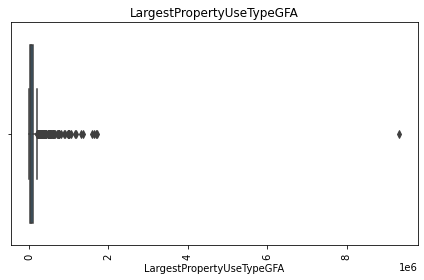

count    1.214000e+03
mean     1.115280e+05
std      3.197836e+05
min      7.245000e+03
25%      2.582275e+04
50%      4.500000e+04
75%      9.997250e+04
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64


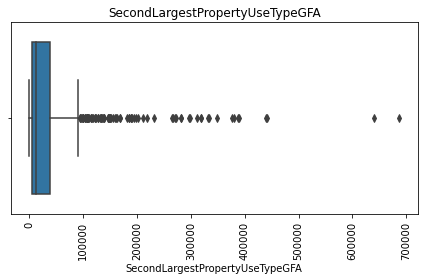

count       666.000000
mean      40603.291737
std       75011.060097
min           0.000000
25%        4994.750000
50%       12667.000000
75%       39235.500000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64


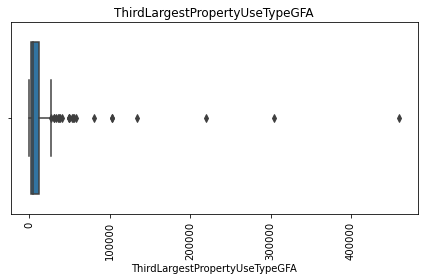

count       248.000000
mean      14070.613710
std       40029.201933
min           0.000000
25%        1801.500000
50%        5273.500000
75%       11859.500000
max      459748.000000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64


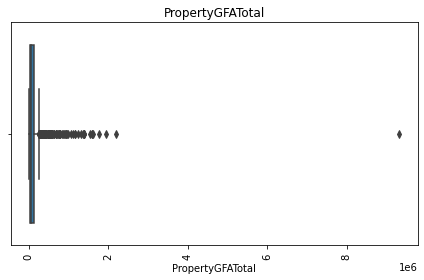

count    1.214000e+03
mean     1.345501e+05
std      3.413380e+05
min      1.128500e+04
25%      2.880000e+04
50%      5.026650e+04
75%      1.227772e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64


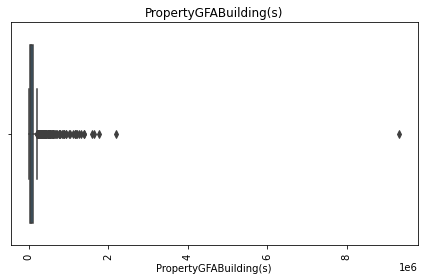

count    1.214000e+03
mean     1.183063e+05
std      3.272467e+05
min      1.092500e+04
25%      2.779100e+04
50%      4.769250e+04
75%      1.026958e+05
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64


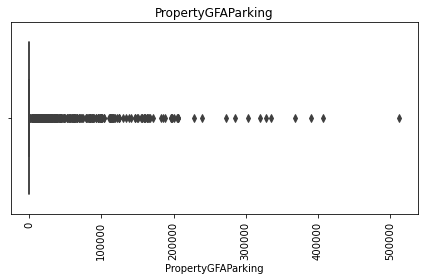

count      1214.000000
mean      16243.761944
std       47495.271874
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64


In [60]:
#Create a boxplot
for col in GFA_values:
    sns.boxplot(df[col])
    plt.title(col)
    plt.xticks(rotation='90')
    plt.tight_layout()
    plt.show()
    print(df[col].describe())

In [61]:
#nan
for col in GFA_values:
    print(f'{col :-<70} {df[col].isna().sum()}')

LargestPropertyUseTypeGFA--------------------------------------------- 0
SecondLargestPropertyUseTypeGFA--------------------------------------- 548
ThirdLargestPropertyUseTypeGFA---------------------------------------- 966
PropertyGFATotal------------------------------------------------------ 0
PropertyGFABuilding(s)------------------------------------------------ 0
PropertyGFAParking---------------------------------------------------- 0


**SecondLargestPropertyUseType(GFA)** et **ThirdLargestPropertyUseType(GFA)** désignent les surfaces des 2e et 3e utilisation du bâtiment, Ici nous faisons le choix de remplacer les nan par 0

In [62]:
df['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
df['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

## Drop valeurs abérrantes de GFA

In [63]:
df.loc[(df['LargestPropertyUseTypeGFA'] > df['PropertyGFATotal']), ['PropertyName', 'LargestPropertyUseTypeGFA','PropertyGFATotal']]

,PropertyName,LargestPropertyUseTypeGFA,PropertyGFATotal
11,5679-W Seattle,336640.0,333176
35,Plant 2 Site,757027.0,494835
43,Seattle Hilton Hotel,348630.0,332210
66,Firestone Store#012432,72072.0,58320
72,City Place IV - SEDO,598801.0,571329
...,...,...,...
3264,Virginia Mason Medical Center - 2149,1010135.0,374466
3294,Audi Seattle UVA Bldg,83600.0,33648
3319,Hilton Garden Inn Seattle,159500.0,144614
3322,Honda of Seattle/Toyota of Seattle,202171.0,108036


In [64]:
df.loc[(df['PropertyGFABuilding(s)'] > df['PropertyGFATotal']), ['PropertyName', 'PropertyGFABuilding(s)','PropertyGFATotal']]

,PropertyName,PropertyGFABuilding(s),PropertyGFATotal


In [65]:
df.loc[(df['PropertyGFAParking'] > df['PropertyGFATotal']), ['PropertyName', 'PropertyGFAParking','PropertyGFATotal']]

,PropertyName,PropertyGFAParking,PropertyGFATotal


In [66]:
df.loc[(df['SecondLargestPropertyUseTypeGFA'] > df['LargestPropertyUseTypeGFA']), ['PropertyName', 'SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA']]

,PropertyName,SecondLargestPropertyUseTypeGFA,LargestPropertyUseTypeGFA


In [67]:
df.loc[(df['ThirdLargestPropertyUseTypeGFA'] > df['LargestPropertyUseTypeGFA']), ['PropertyName', 'ThirdLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA']]

,PropertyName,ThirdLargestPropertyUseTypeGFA,LargestPropertyUseTypeGFA


In [68]:
df.loc[(df['ThirdLargestPropertyUseTypeGFA'] > df['SecondLargestPropertyUseTypeGFA']), ['PropertyName', 'ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA']]

,PropertyName,ThirdLargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA


In [69]:
# élimination
df = df.loc[(df['LargestPropertyUseTypeGFA'] <= df['PropertyGFATotal'])]

In [70]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,USE,Name,Center,Fitness,Food,Market,Bank,BANK,Hotel,Office,Sculpture,Club,Museum,Art,Metro,University,Hyatt_Place,Automobili_Italiane
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,...,NaN,Compliant,NaN,249.98,2.83,Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,...,NaN,Compliant,NaN,295.86,2.86,Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,...,NaN,Compliant,NaN,2089.28,2.19,Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,...,NaN,Compliant,NaN,286.43,4.67,Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,...,NaN,Compliant,NaN,505.01,2.88,Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,50220,2016,Nonresidential COS,Office,Genesee/SC SE HQ,4420 S Genesee,Seattle,WA,NaN,4154300585,2,SOUTHEAST,47.56440,-122.27813,1960,1.0,1,15398,0,15398,Office,Office,15398.0,...,NaN,Error - Correct Default Data,NaN,7.79,0.51,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3370,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,NaN,2524039059,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,1982,1.0,1,18261,0,18261,Other - Recreation,Other - Recreation,18261.0,...,NaN,Compliant,NaN,20.33,1.11,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,...,NaN,Compliant,NaN,32.17,2.01,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop Feature

In [71]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [72]:
pd.crosstab(df['ComplianceStatus'],
            df['DefaultData'])

DefaultData,False,True
ComplianceStatus,,
Compliant,1045,0
Error - Correct Default Data,0,11
Missing Data,2,0
Non-Compliant,12,0


In [73]:
df.drop(['OSEBuildingID', 'Address', 'City', 'State', 'ZipCode',
         'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
         'YearsENERGYSTARCertified', 'USE', 'Name',
         'Center', 'Fitness', 'Food', 'Market', 'Bank', 'BANK', 'Hotel',
         'Office', 'Sculpture', 'Club', 'Museum', 'Art', 'Metro', 'University',
         'Hyatt_Place', 'Automobili_Italiane', 'ListOfAllPropertyUseTypes', 
         'Comments', 'DefaultData', 'Outlier','ComplianceStatus'], axis=1, inplace=True)

Colonnes n'apportant pas d'information pour la suite de notre étude, elles peuvent etre interessantes pour une analyse plus descriptives car elles se focalisent sur l'emplacement :
* la feature 'OSEBuildingID' nous donne un ID, nous utiliserons l'index du Dataframe
* Les features "City" et "State" comportent toujours les mêmes valeurs (Seattle, WA).
* Les features "Adress", "ZipCode" , 'TaxParcelIdentificationNumber'et 'CouncilDistrictCode'donnent des informations sur la localisation. Nous gardons uniquement Neighborhood, Latitude/Longitude ainsi pouvoir réaliser des visualisations avec geopanda
* Les feature "DefaultData" et 'ComplianceStatus' donnent des informations sur l'ajout de valeurs par défaut, mais sans préciser laquelle.
* La feature 'Outlier' doit aider à trouver les outliers, nous ferons notre propre étude
* La feature 'ListOfAllPropertyUseTypes'


In [74]:
df

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,2016,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,88434.0,NaN,0.0,NaN,0.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
1,2016,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
2,2016,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,756493.0,NaN,0.0,NaN,0.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
3,2016,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,61320.0,NaN,0.0,NaN,0.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
4,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,2016,Nonresidential COS,Office,Genesee/SC SE HQ,SOUTHEAST,47.56440,-122.27813,1960,1.0,1,15398,0,15398,Office,15398.0,NaN,0.0,NaN,0.0,93.0,25.200001,26.900000,64.099998,66.699997,3.878100e+05,4.141724e+05,0.00,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,7.79,0.51
3370,2016,Nonresidential COS,Other,High Point Community Center,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,1982,1.0,1,18261,0,18261,Other - Recreation,18261.0,NaN,0.0,NaN,0.0,NaN,51.000000,56.200001,126.000000,136.600006,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,20.33,1.11
3371,2016,Nonresidential COS,Office,Horticulture building,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,12294.0,NaN,0.0,NaN,0.0,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70
3372,2016,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,NaN,0.0,NaN,0.0,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01


,Total,Percent
ThirdLargestPropertyUseType,835,0.780374
SecondLargestPropertyUseType,459,0.428972
ENERGYSTARScore,387,0.361682
SiteEnergyUseWN(kBtu),1,0.000935
SiteEUI(kBtu/sf),1,0.000935
SiteEUIWN(kBtu/sf),1,0.000935
SiteEnergyUse(kBtu),0,0.000000
SourceEUI(kBtu/sf),0,0.000000
SourceEUIWN(kBtu/sf),0,0.000000
DataYear,0,0.000000


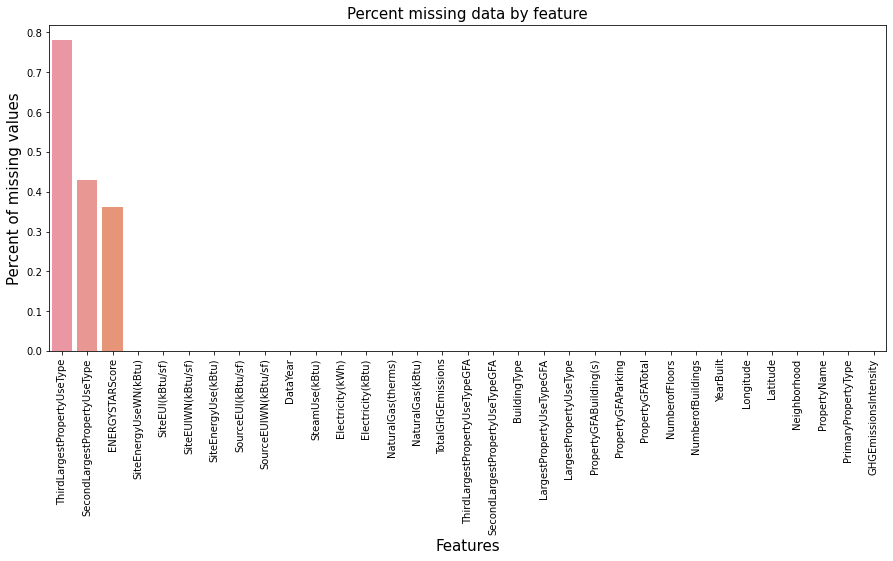

In [75]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

## Duplicate value

In [76]:
df.duplicated(keep=False).value_counts()

False    1070
dtype: int64

Dans la visualisation ci-dessus, certaines variables apparaissent déjà comme redondantes :

Electricity(kWh) et Electricity(kBtu),
NaturalGas(therms) et NaturalGas(kBtu)

In [77]:
df[['Electricity(kWh)','Electricity(kBtu)']]

,Electricity(kWh),Electricity(kBtu)
0,1.156514e+06,3.946027e+06
1,9.504252e+05,3.242851e+06
2,1.451544e+07,4.952666e+07
3,8.115253e+05,2.768924e+06
4,1.573449e+06,5.368607e+06
...,...,...
3369,8.134140e+04,2.775369e+05
3370,1.853347e+05,6.323620e+05
3371,1.536550e+05,5.242709e+05
3372,1.162210e+05,3.965461e+05


Converting from kWh to kBtu
<br>
**1 kWh x 3.412 = 3.412 kBtu**

In [78]:
df[['NaturalGas(therms)','NaturalGas(kBtu)']]

,NaturalGas(therms),NaturalGas(kBtu)
0,12764.529300,1.276453e+06
1,51450.816410,5.145082e+06
2,14938.000000,1.493800e+06
3,18112.130860,1.811213e+06
4,88039.984380,8.803998e+06
...,...,...
3369,1102.729980,1.102730e+05
3370,2997.199951,2.997200e+05
3371,3254.750244,3.254750e+05
3372,5537.299805,5.537300e+05


# Feature Engineering

## Build Date 

In [79]:
df['Build_Age'] = df['DataYear'] - df['YearBuilt']

In [80]:
df['Build_Age'].max()

116

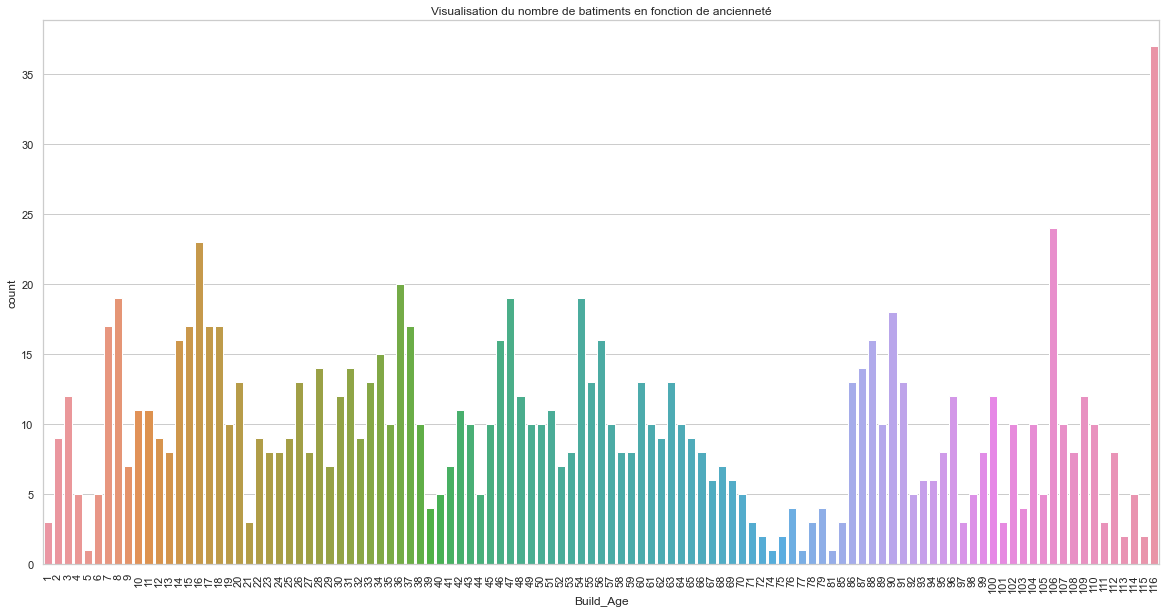

In [81]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.countplot(x='Build_Age', data=df).set(title='Visualisation du nombre de batiments en fonction de ancienneté')
plt.tick_params(axis='x', rotation=90)
plt.show()

In [82]:
df[df['Build_Age']==116]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Build_Age
40,2016,NonResidential,Small- and Mid-Sized Office,El Centro de la Raza,GREATER DUWAMISH,47.58034,-122.31132,1900,1.0,2,52554,0,52554,Office,51029.0,Other - Education,7849.0,NaN,0.0,83.0,50.099998,53.500000,108.699997,112.300003,2.951331e+06,3.150636e+06,0.000000e+00,4.629980e+05,1579749.0,13715.820310,1371582.0,83.86,1.60,116
145,2016,Nonresidential COS,Other,Armory Building,LAKE UNION,47.62759,-122.33661,1900,1.0,1,50000,0,50000,Museum,43000.0,NaN,0.0,NaN,0.0,NaN,175.600006,184.699997,368.899994,373.700012,7.548807e+06,7.942538e+06,0.000000e+00,1.113108e+06,3797924.0,37508.820310,3750882.0,225.69,4.51,116
154,2016,NonResidential,Small- and Mid-Sized Office,Washington Park Building,DOWNTOWN,47.60105,-122.33518,1900,1.0,3,44558,0,44558,Office,34416.0,Self-Storage Facility,7672.0,Restaurant,2470.0,78.0,37.599998,38.599998,101.300003,103.699997,1.677002e+06,1.722053e+06,0.000000e+00,3.861774e+05,1317637.0,3593.650146,359365.0,28.27,0.63,116
216,2016,NonResidential,Small- and Mid-Sized Office,Broderick Building,DOWNTOWN,47.60266,-122.33332,1900,1.0,7,89550,0,89550,Office,64712.0,Retail Store,10058.0,Social/Meeting Hall,7030.0,85.0,47.700001,50.599998,141.600006,148.800003,3.903260e+06,4.135330e+06,3.483868e+05,1.041874e+06,3554872.0,0.000000,0.0,51.67,0.58,116
217,2016,NonResidential,Small- and Mid-Sized Office,The Pioneer Building,DOWNTOWN,47.60219,-122.33347,1900,1.0,6,89355,0,89355,Office,82355.0,Retail Store,7000.0,NaN,0.0,66.0,46.799999,46.900002,145.399994,145.500000,4.178234e+06,4.188309e+06,0.000000e+00,1.206507e+06,4116601.0,616.320007,61632.0,31.97,0.36,116
426,2016,NonResidential,Restaurant,Pier 57,DOWNTOWN,47.60613,-122.34115,1900,1.0,1,43728,0,43728,Restaurant,43728.0,NaN,0.0,NaN,0.0,NaN,263.200012,271.100006,276.299988,284.600006,1.150804e+07,1.185445e+07,0.000000e+00,0.000000e+00,0.0,115080.351600,11508035.0,611.19,13.98,116
452,2016,NonResidential,Small- and Mid-Sized Office,The Globe Building,DOWNTOWN,47.59979,-122.33380,1900,1.0,4,69817,0,69817,Office,34647.0,Retail Store,26039.0,NaN,0.0,87.0,35.900002,39.200001,82.500000,87.000000,2.178074e+06,2.380144e+06,7.710852e+05,3.649247e+05,1245123.0,1618.659790,161866.0,76.80,1.10,116
453,2016,NonResidential,Small- and Mid-Sized Office,The Grand Central Building,DOWNTOWN,47.60035,-122.33379,1900,1.0,4,84750,0,84750,Office,41609.0,Enclosed Mall,28734.0,NaN,0.0,NaN,29.799999,30.799999,86.099998,87.199997,2.094725e+06,2.165173e+06,0.000000e+00,5.412783e+05,1846842.0,2478.827148,247883.0,26.04,0.31,116
454,2016,NonResidential,Small- and Mid-Sized Office,Interurban Building,DOWNTOWN,47.60146,-122.33248,1900,1.0,6,75496,13320,62176,Office,45799.0,Retail Store,9739.0,Restaurant,4689.0,NaN,59.299999,62.099998,186.100006,195.000000,3.570162e+06,3.740114e+06,0.000000e+00,1.046354e+06,3570162.0,0.000000,0.0,24.89,0.33,116
455,2016,NonResidential,Large Office,Occidental Mall,DOWNTOWN,47.59962,-122.33247,1900,1.0,4,164380,0,164380,Office,123607.0,Retail Store,20795.0,NaN,0.0,79.0,53.000000,53.900002,145.800003,146.800003,7.655751e+06,7.778893e+06,3.995383e+05,1.816153e+06,6196714.0,10594.980470,1059498.0,130.31,0.79,116


In [83]:
df.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Build_Age'],
      dtype='object')

<AxesSubplot:>

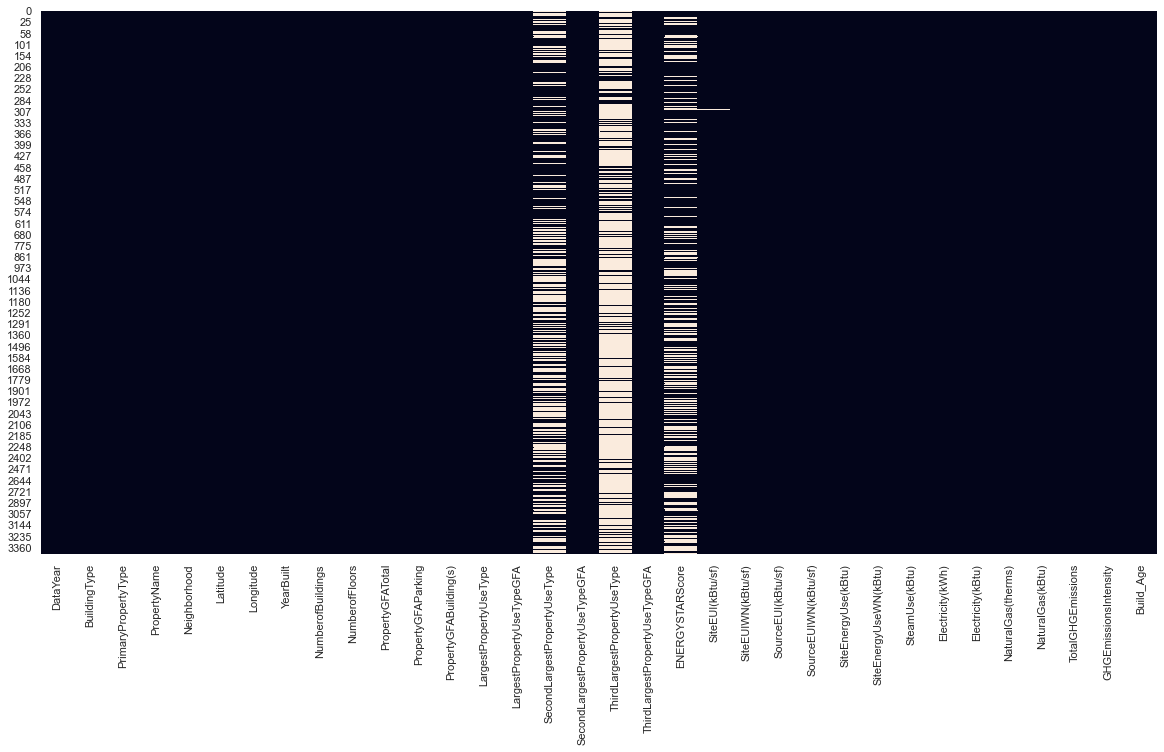

In [84]:
#sisualisation des Nan avec seaborn et le heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [85]:
Energy = ['SiteEUI(kBtu/sf)',
          'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
          'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
          'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
          'NaturalGas(kBtu)']

## Surface avec GFA

### UseTypeGFA

In [86]:
df = df.assign(Surface=lambda x: (x['LargestPropertyUseTypeGFA'] +
               x['SecondLargestPropertyUseTypeGFA'] + x['ThirdLargestPropertyUseTypeGFA']))

In [87]:
df = df.assign(Diff=lambda x: (x['PropertyGFATotal'] -
               x['Surface']))

In [88]:
df['Diff'].value_counts(ascending=True)

 16080.0      1
 17535.0      1
 14049.0      1
 8146.0       1
 1656.0       1
           ... 
-15000.0      2
 2028.0       2
-100.0        2
 500.0        3
 0.0        500
Name: Diff, Length: 561, dtype: int64

In [89]:
df.loc[(df['Diff'] == 0 ),['PropertyName', 'Diff','PropertyGFATotal','Surface']]

,PropertyName,Diff,PropertyGFATotal,Surface
0,Mayflower park hotel,0.0,88434,88434.0
1,Paramount Hotel,0.0,103566,103566.0
3,HOTEL MAX,0.0,61320,61320.0
7,Paramount Theatre,0.0,102761,102761.0
8,311wh-Pioneer Square,0.0,163984,163984.0
...,...,...,...,...
3369,Genesee/SC SE HQ,0.0,15398,15398.0
3370,High Point Community Center,0.0,18261,18261.0
3371,Horticulture building,0.0,12294,12294.0
3372,International district/Chinatown CC,0.0,16000,16000.0


In [90]:
df.loc[(df['Diff'] != 0 ),['PropertyName', 'Diff','PropertyGFATotal','Surface']]

,PropertyName,Diff,PropertyGFATotal,Surface
2,5673-The Westin Seattle,199617.000000,956110,756493.000000
4,WARWICK SEATTLE HOTEL (ID8),-15874.000000,175580,191454.000000
5,West Precinct,8458.000000,97288,88830.000000
6,Camlin,1656.000000,83008,81352.000000
10,Hotel Monaco Seattle,19279.000000,153163,133884.000000
...,...,...,...,...
3329,400 FAIRVIEW OFFICE BLDG,-14632.200195,536697,551329.200195
3337,Olympic Hospitality,-2873.000000,126823,129696.000000
3360,Northgate Community Center,775.000000,20616,19841.000000
3364,Ballard Community Center,566.000000,16795,16229.000000


<AxesSubplot:xlabel='Diff'>

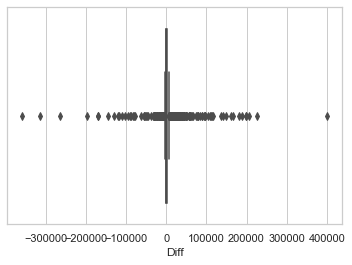

In [91]:
sns.boxplot(df['Diff'])

### property, parking

In [92]:
df = df.assign(Diff_1=lambda x: (x['PropertyGFATotal'] -
               x['PropertyGFAParking'] - x['PropertyGFABuilding(s)']))

In [93]:
df['Diff_1'].value_counts()

0    1070
Name: Diff_1, dtype: int64

## Surface /étage

In [94]:
df = df.assign(Diff_1=lambda x: (x['PropertyGFATotal'] -
               x['PropertyGFAParking'] - x['PropertyGFABuilding(s)']))

## Geopandas

In [95]:
# Create a geometry column by constructing Point objects from the lon and lat columns
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

In [96]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [97]:
gdf.crs

In [98]:
gdf = gdf[gdf.is_valid == True]

<AxesSubplot:>

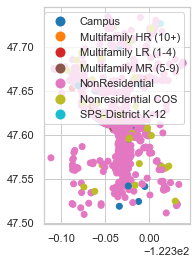

In [99]:
gdf['geometry'].centroid
gdf.plot(column = "BuildingType",legend=True)

Nous pouvons également calculer la surface moyenne par bâtiment et par étage

check si dans les résidential il n'y a pas des property type à usage non résidential

Other dans property type, renseigner trouver l'info

faire une condition pour conserver les résidential avec mauvaise étiquette

# Analyse univariée

## Distribution des variables quantitatives

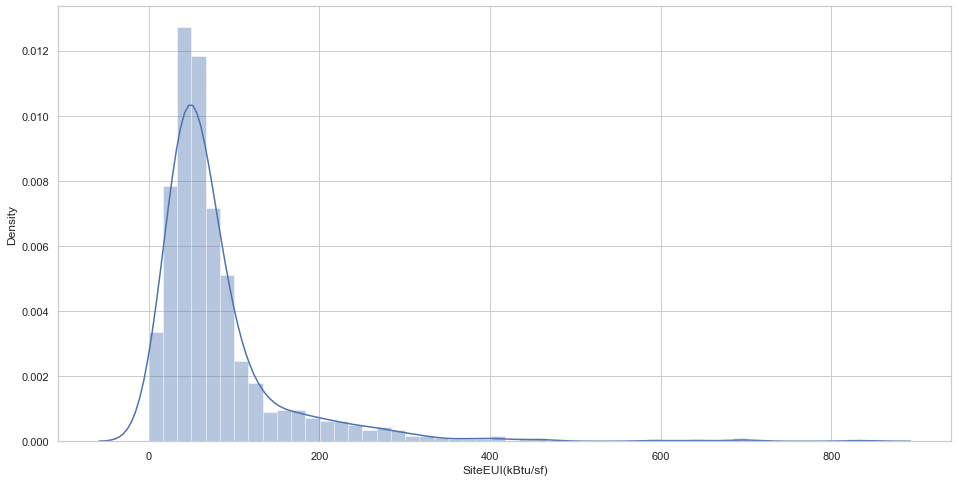

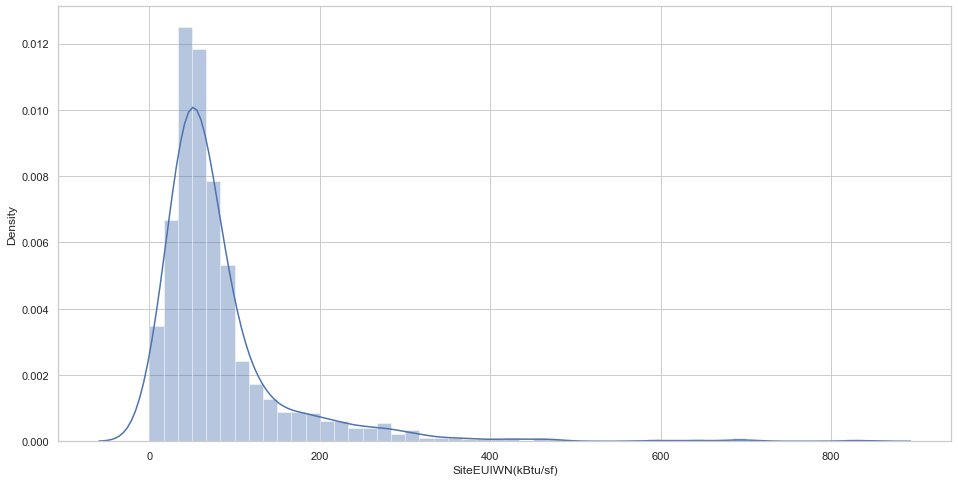

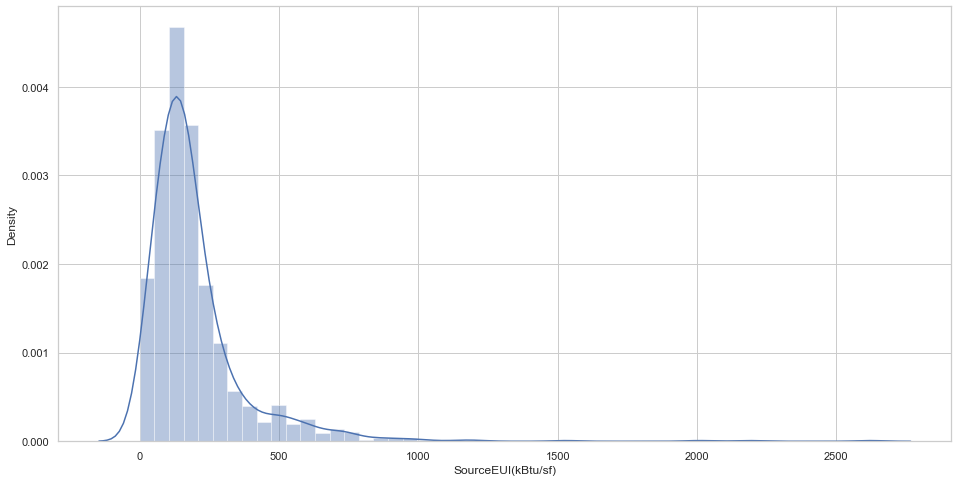

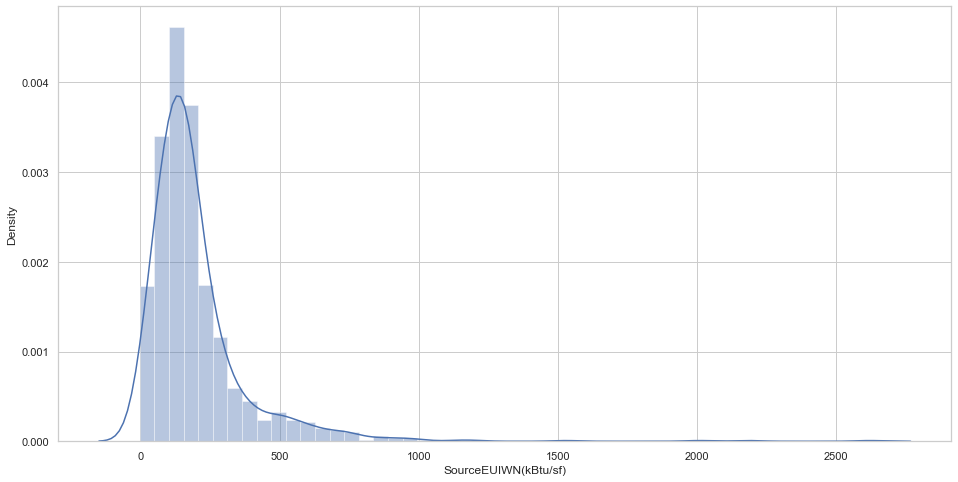

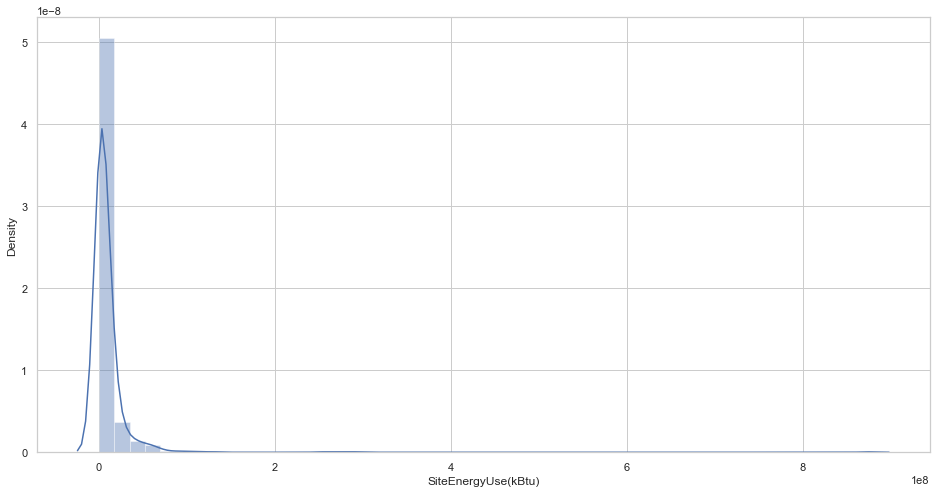

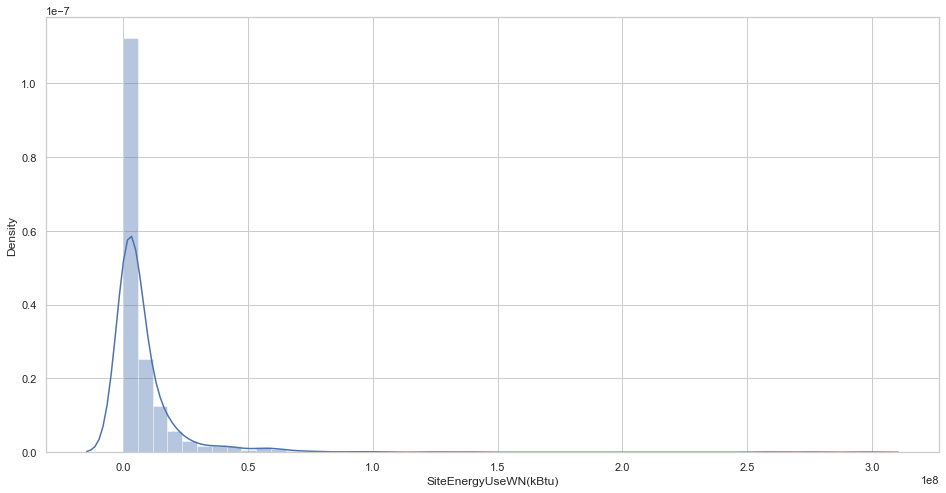

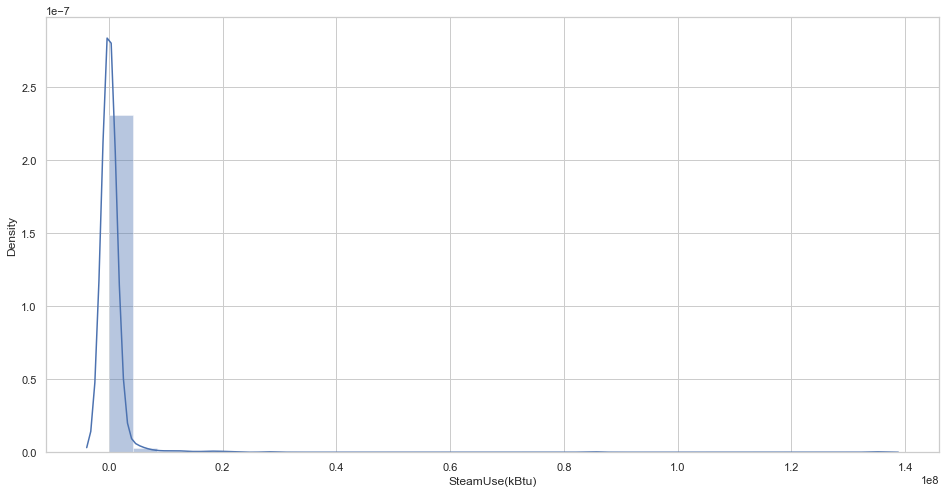

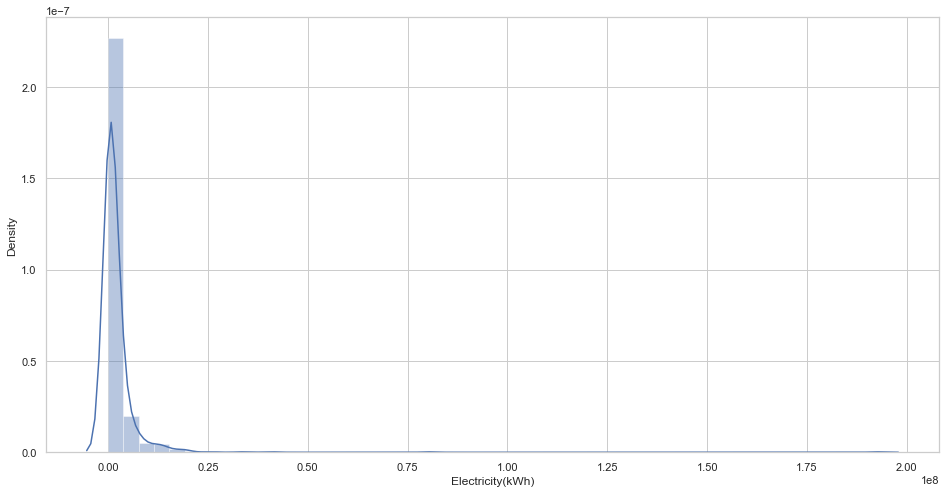

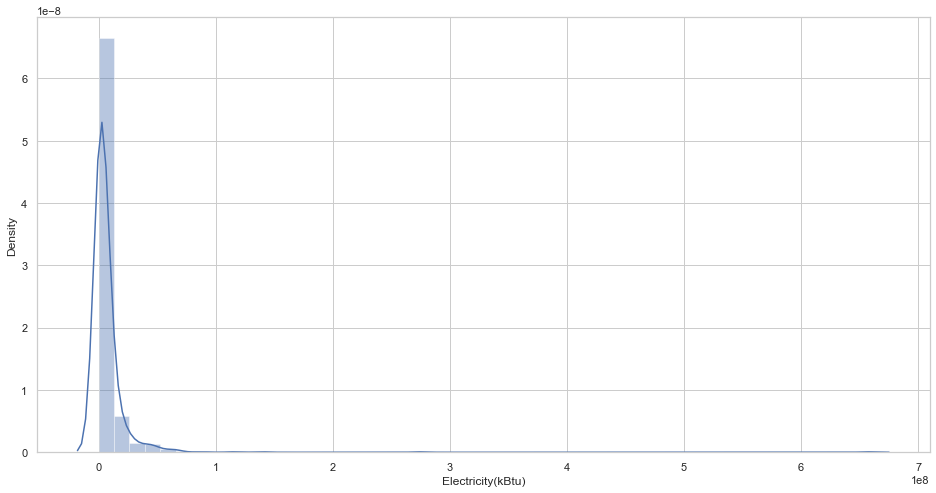

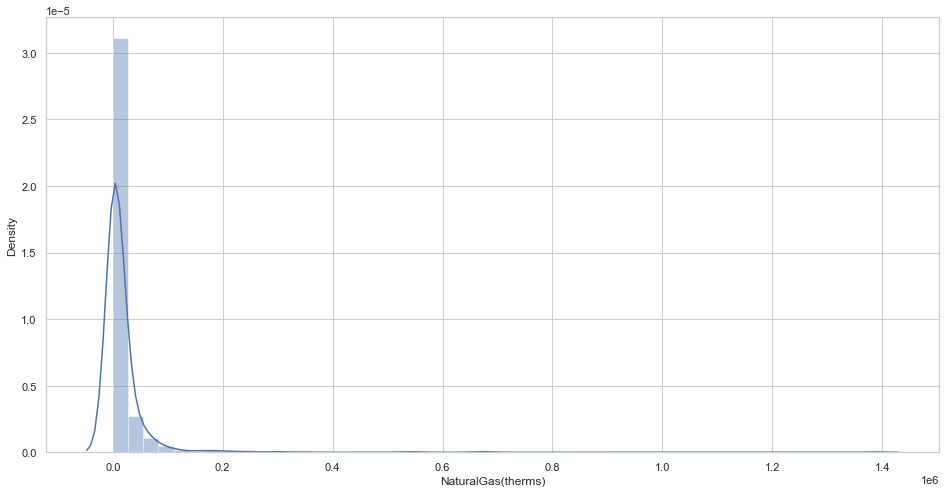

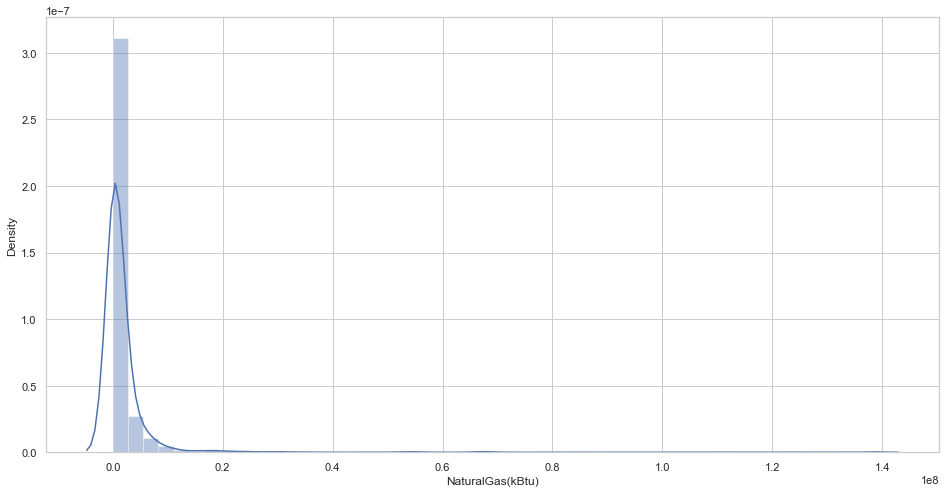

In [100]:
#distplot
for col in df[Energy]:
    plt.figure(figsize=(16, 8))
    sns.distplot(df[col], kde=True)
    plt.show()

Latitude


<Figure size 1152x576 with 0 Axes>

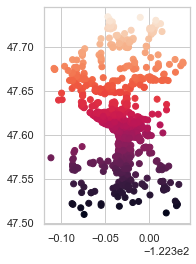

Longitude


<Figure size 1152x576 with 0 Axes>

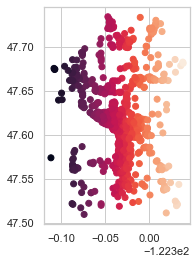

NumberofBuildings


<Figure size 1152x576 with 0 Axes>

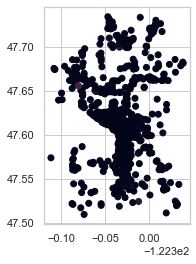

LargestPropertyUseTypeGFA


<Figure size 1152x576 with 0 Axes>

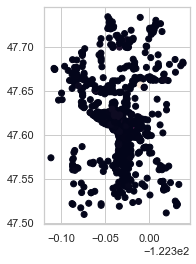

SecondLargestPropertyUseTypeGFA


<Figure size 1152x576 with 0 Axes>

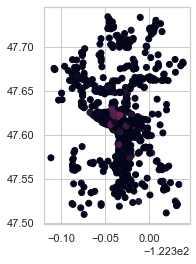

ThirdLargestPropertyUseTypeGFA


<Figure size 1152x576 with 0 Axes>

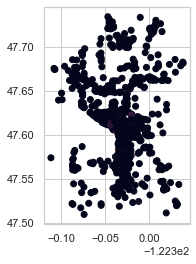

ENERGYSTARScore


<Figure size 1152x576 with 0 Axes>

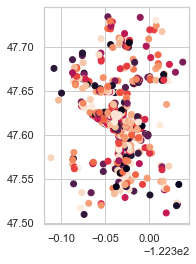

SiteEUI(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

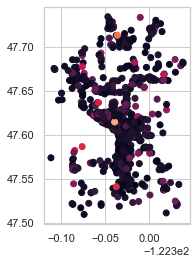

SiteEUIWN(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

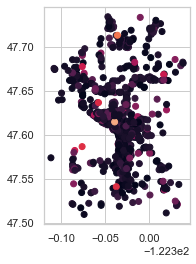

SourceEUI(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

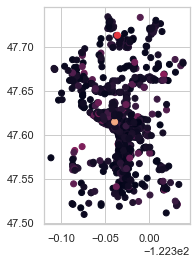

SourceEUIWN(kBtu/sf)


<Figure size 1152x576 with 0 Axes>

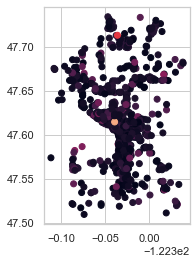

SiteEnergyUse(kBtu)


<Figure size 1152x576 with 0 Axes>

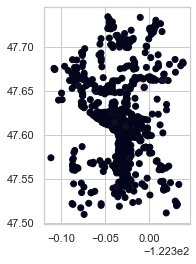

SiteEnergyUseWN(kBtu)


<Figure size 1152x576 with 0 Axes>

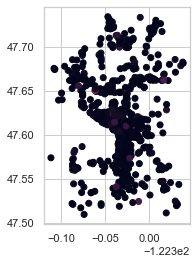

SteamUse(kBtu)


<Figure size 1152x576 with 0 Axes>

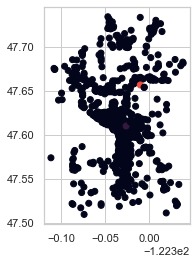

Electricity(kWh)


<Figure size 1152x576 with 0 Axes>

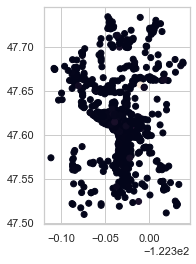

Electricity(kBtu)


<Figure size 1152x576 with 0 Axes>

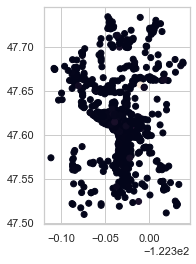

NaturalGas(therms)


<Figure size 1152x576 with 0 Axes>

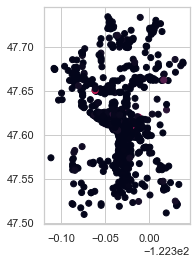

NaturalGas(kBtu)


<Figure size 1152x576 with 0 Axes>

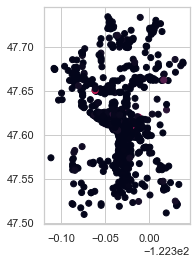

TotalGHGEmissions


<Figure size 1152x576 with 0 Axes>

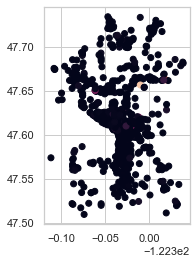

GHGEmissionsIntensity


<Figure size 1152x576 with 0 Axes>

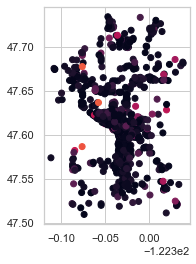

Surface


<Figure size 1152x576 with 0 Axes>

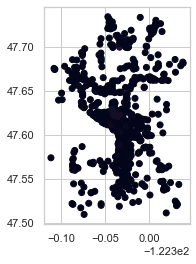

Diff


<Figure size 1152x576 with 0 Axes>

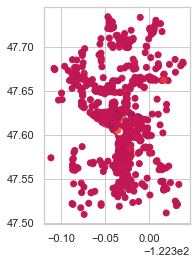

In [101]:
#distplot
for col in gdf.select_dtypes('float'):
    plt.figure(figsize=(16, 8))
    print(col)
    gdf.plot(column = col)
    plt.show()

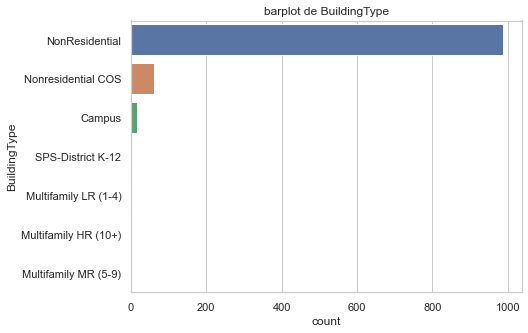

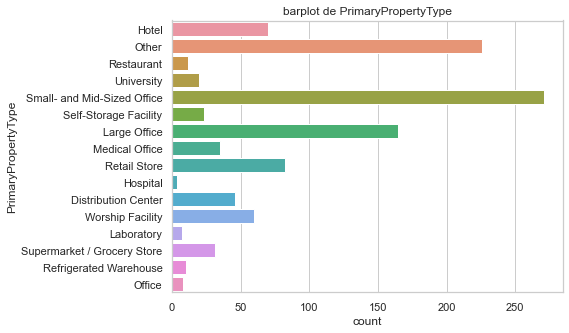

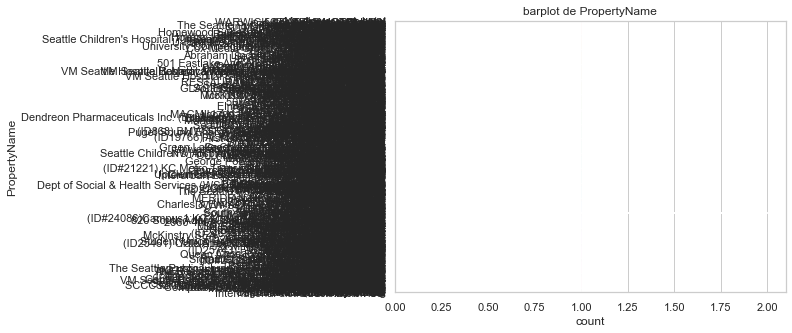

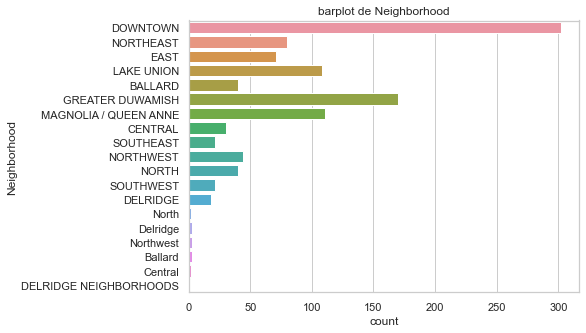

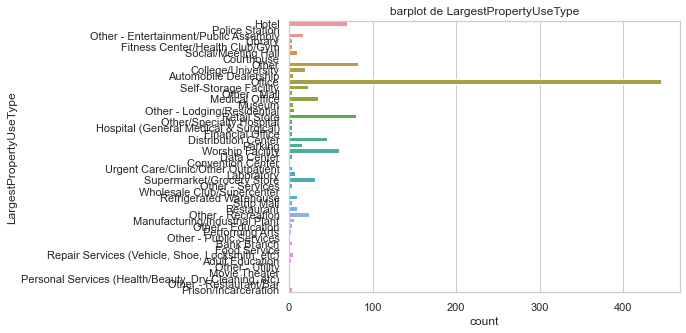

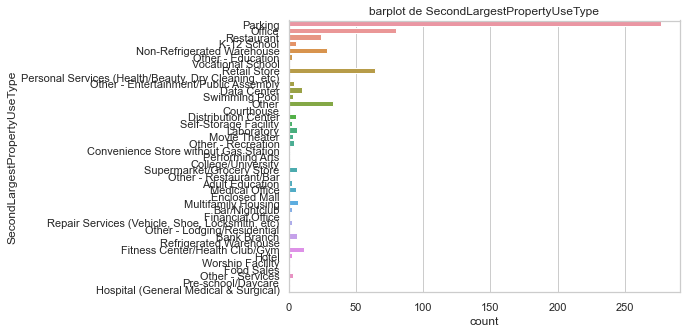

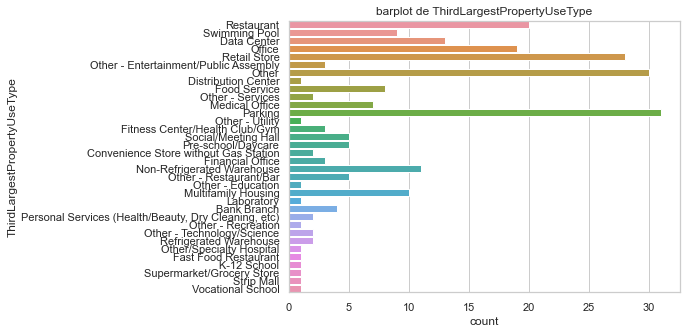

In [102]:
for col in df.select_dtypes('object'):
    plt.figure(figsize=(7,5))
    sns.countplot(y=df[col])
    plt.title('barplot de '+col)
    plt.show()

# Analyse Bivariée

## Matrice de Corrélation

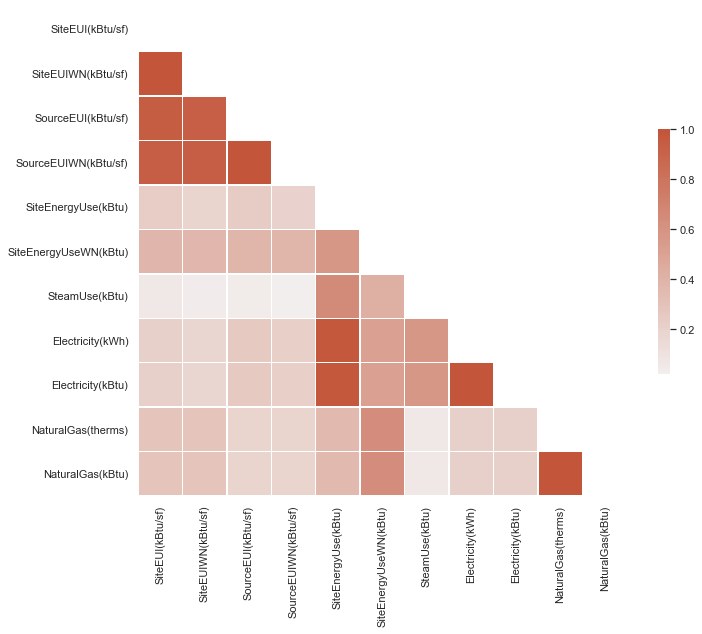

In [103]:
# Compute the correlation matrix
corr = df[Energy ].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Observation suite à la matrice de corrélation:

* 
* 
* 

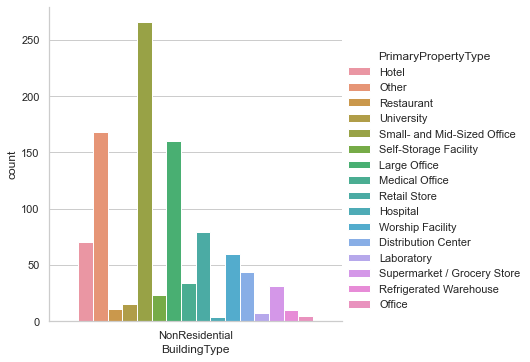

In [104]:
sns.catplot(x="BuildingType", hue="PrimaryPropertyType",
            data=df[df["BuildingType"] == "NonResidential"], kind='count', legend_out=True)

surprimer 1 row WA dans bulting type >> check documentation pour voir la signification

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'NonResidential'),
  Text(1, 0, 'Nonresidential COS'),
  Text(2, 0, 'Campus'),
  Text(3, 0, 'SPS-District K-12'),
  Text(4, 0, 'Multifamily LR (1-4)'),
  Text(5, 0, 'Multifamily HR (10+)'),
  Text(6, 0, 'Multifamily MR (5-9)')])

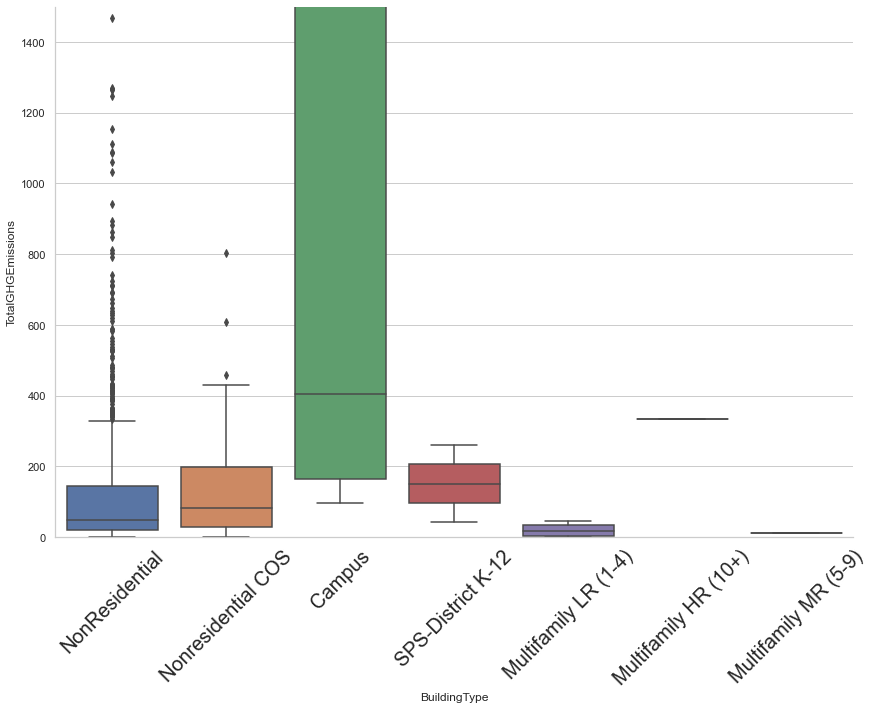

In [105]:
sns.catplot(x = 'BuildingType' , y = 'TotalGHGEmissions', data = df ,kind='box',height=8, aspect=1.5)
plt.ylim(0,1500)
plt.xticks(rotation = 45, fontsize = 20)

In [106]:
df.to_csv('Building_Energy_Benchmarking.csv', index=False, header=True)

In [107]:
df.shape

(1070, 38)